In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para que las gráficas se vean bien en el notebook
sns.set_theme(style="whitegrid")


In [24]:
# Cargar el archivo CSV
file_path = "../data/raw/2023_accidents_causa_conductor_gu_bcn_.csv"
data = pd.read_csv(file_path, encoding='utf-8')

# Ver las primeras filas del DataFrame
data.head()


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [25]:
# Verificar las dimensiones del dataset
print(f"Dimensiones del dataset: {data.shape}")

# Verificar los tipos de datos
print("\nTipos de datos:")
print(data.dtypes)

# Resumen estadístico de las columnas numéricas
print("\nResumen estadístico:")
print(data.describe())

Dimensiones del dataset: (8897, 20)

Tipos de datos:
Numero_expedient             object
Codi_districte                int64
Nom_districte                object
Codi_barri                    int64
Nom_barri                    object
Codi_carrer                   int64
Nom_carrer                   object
Num_postal                   object
Descripcio_dia_setmana       object
NK_Any                        int64
Mes_any                       int64
Nom_mes                      object
Dia_mes                       int64
Hora_dia                      int64
Descripcio_torn              object
Descripcio_causa_mediata     object
Coordenada_UTM_X_ED50       float64
Coordenada_UTM_Y_ED50       float64
Longitud_WGS84              float64
Latitud_WGS84               float64
dtype: object

Resumen estadístico:
       Codi_districte   Codi_barri    Codi_carrer  NK_Any      Mes_any  \
count     8897.000000  8897.000000    8897.000000  8897.0  8897.000000   
mean         4.850961    27.265932  254856.


Valores nulos por columna:
Num_postal     4
dtype: int64


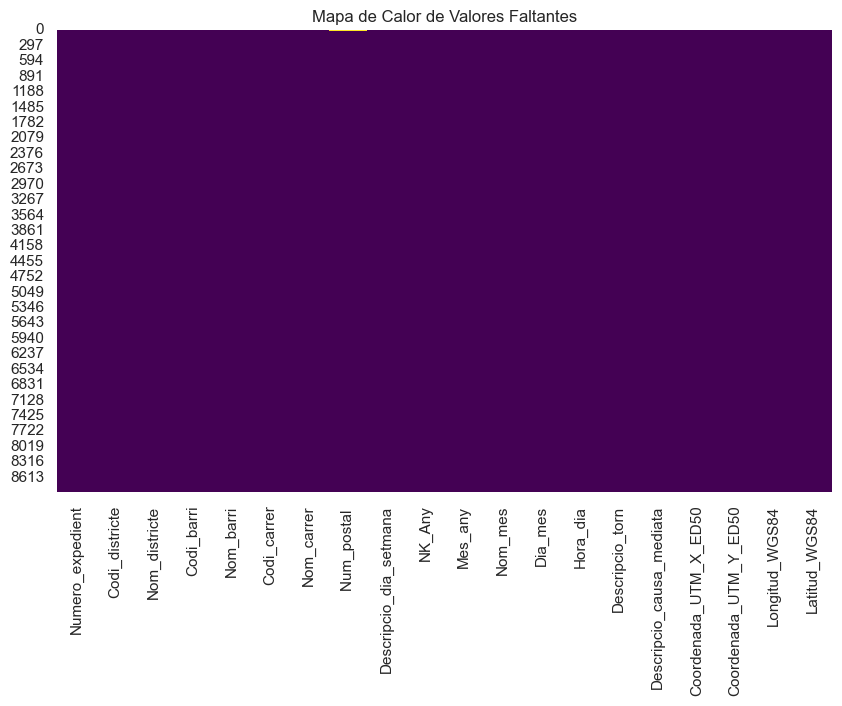

In [26]:
# Contar los valores nulos por columna
missing_values = data.isnull().sum()
print("\nValores nulos por columna:")
print(missing_values[missing_values > 0])

# Visualizar los valores faltantes con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de Calor de Valores Faltantes")
plt.show()

In [27]:
# Eliminar filas duplicadas
data.drop_duplicates(inplace=True)
print(f"\nFilas después de eliminar duplicados: {data.shape[0]}")

# Eliminar columnas con más del 50% de valores nulos
threshold = len(data) * 0.5
data.dropna(thresh=threshold, axis=1, inplace=True)

# Rellenar valores nulos en columnas numéricas con la media
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Rellenar valores nulos en columnas categóricas con la moda
cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])


Filas después de eliminar duplicados: 8897


In [28]:
# Convertir la columna 'Hora_dia' a formato de 24 horas si no está ya en ese formato
if data['Hora_dia'].dtype != 'int64':
    data['Hora_dia'] = pd.to_numeric(data['Hora_dia'], errors='coerce')

# Convertir la columna de fechas a datetime
if 'Fecha' in data.columns:
    data['Fecha'] = pd.to_datetime(data['Fecha'], errors='coerce')

# Estandarizar los nombres de los distritos y causas a minúsculas
data['Nom_districte'] = data['Nom_districte'].str.lower().str.strip()
data['Descripcio_causa_mediata'] = data['Descripcio_causa_mediata'].str.lower().str.strip()


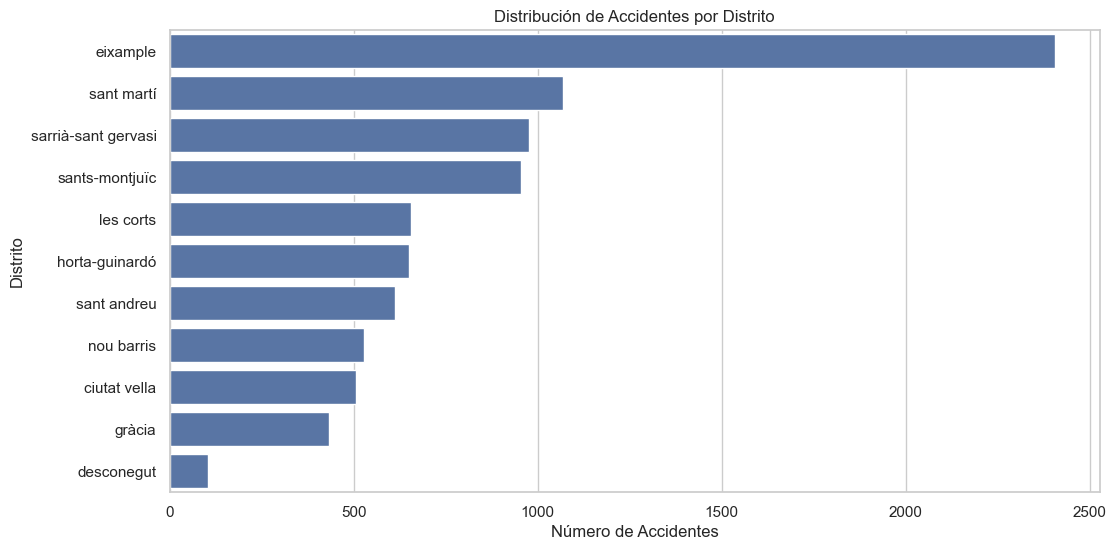

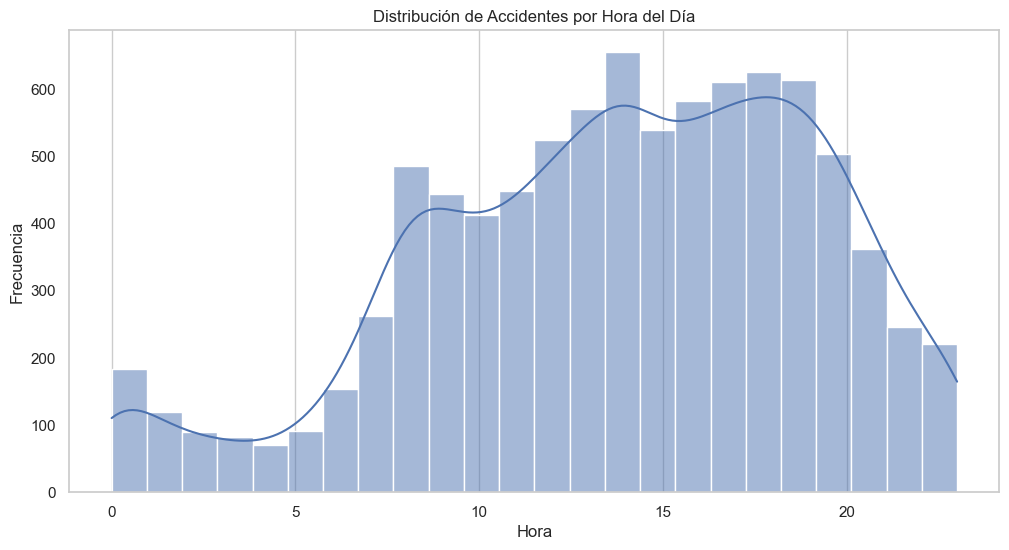

In [29]:
# Visualizar la distribución de accidentes por distrito
plt.figure(figsize=(12, 6))
sns.countplot(y='Nom_districte', data=data, order=data['Nom_districte'].value_counts().index)
plt.title("Distribución de Accidentes por Distrito")
plt.xlabel("Número de Accidentes")
plt.ylabel("Distrito")
plt.show()

# Visualizar la distribución por hora
plt.figure(figsize=(12, 6))
sns.histplot(data['Hora_dia'], bins=24, kde=True)
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
plt.grid(axis='y')
plt.show()


In [31]:
# Guardar el DataFrame limpio para futuros análisis
output_path = "../data/processed/accidents_data_clean.csv"
data.to_csv(output_path, index=False)
print(f"Datos limpios guardados en: {output_path}")


Datos limpios guardados en: ../data/processed/accidents_data_clean.csv
